In [1]:
import pandas as pd

data = pd.read_csv("logo_wizard_survey.csv")
data.head()

,like_service_our,like_service_other,like_logo_our,like_logo_other,unique_our,unique_other,retries_our,retries_other,interface_our,interface_other,editor_our,editor_other,is_creative,sex,age,city
0,Понравилось,Понравилось,Да,Да,Да,Нет,10+,9-10,4,5,5,5,Нет,Женский,18-25,Москва
1,Понравилось,Не понравилось,Да,Да,Да,Нет,6-8,1-2,5,5,4,2,Да,Мужской,18-25,Мытищи
2,Понравилось,Понравилось,Да,Да,Да,Да,6-8,6-8,5,5,4,5,Нет,Мужской,18-25,Москва
3,Понравилось,Понравилось,Да,Нет,Да,Нет,3-5,9-10,3,5,3,3,Нет,Мужской,18-25,Москва
4,Понравилось,Не понравилось,Да,Нет,Да,Нет,6-8,10+,2,4,3,4,Нет,Мужской,26-30,Киров


Закодируем признаки:

In [5]:
data = data.replace(
    {
        "Понравилось": 1,
        "Не понравилось": 0,
        "Да": 1,
        "Нет": 0,
        "Мужской": 1,
        "Женский": 0,
    }
)
data = data.replace(
    {
        "1-2": 1.5,
        "3-5": 4,
        "6-8": 7,
        "9-10": 9.5,
        "10+": 10,
    }
)

data = data.drop(["age", "city"], axis=1)

In [6]:
columns = list(data.columns)
common = ["is_creative", "sex"]
answers_our = [col for col in columns if "our" in col]
answers_other = [col for col in columns if "other" in col]
answers_new = [col[:-4] for col in answers_our]
answers_our.extend(common)
answers_other.extend(common)

data_our = data[answers_our].copy()
data_our["service"] = 1
data_our = data_our.rename(dict(zip(answers_our, answers_new)), axis=1)

data_other = data[answers_other].copy()
data_other["service"] = 0
data_other = data_other.rename(dict(zip(answers_other, answers_new)), axis=1)

data = pd.concat([data_our, data_other]).reset_index(drop=True)

Корреляции признаков:

In [7]:
data.corr()

,like_service,like_logo,unique,retries,interface,editor,is_creative,sex,service
like_service,1.000000,0.569892,0.566465,-0.288437,-0.138926,0.507155,-1.263571e-01,1.744931e-01,5.388159e-01
like_logo,0.569892,1.000000,0.566465,-0.545865,-0.138926,0.446052,-1.263571e-01,1.744931e-01,5.388159e-01
unique,0.566465,0.566465,1.000000,-0.461351,-0.395571,0.526278,-5.534631e-02,-5.031482e-03,8.510645e-01
retries,-0.288437,-0.545865,-0.461351,1.000000,0.095589,-0.185517,-7.169868e-02,-1.767913e-02,-3.615827e-01
interface,-0.138926,-0.138926,-0.395571,0.095589,1.000000,-0.188870,2.952165e-03,3.247382e-02,-4.406051e-01
editor,0.507155,0.446052,0.526278,-0.185517,-0.188870,1.000000,-1.743796e-01,5.128812e-03,4.082483e-01
is_creative,-0.126357,-0.126357,-0.055346,-0.071699,0.002952,-0.174380,1.000000e+00,-2.121212e-01,1.548195e-16
sex,0.174493,0.174493,-0.005031,-0.017679,0.032474,0.005129,-2.121212e-01,1.000000e+00,-9.205483e-17
service,0.538816,0.538816,0.851064,-0.361583,-0.440605,0.408248,1.548195e-16,-9.205483e-17,1.000000e+00


Визуализируем оценки для каждого из сервисов:

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

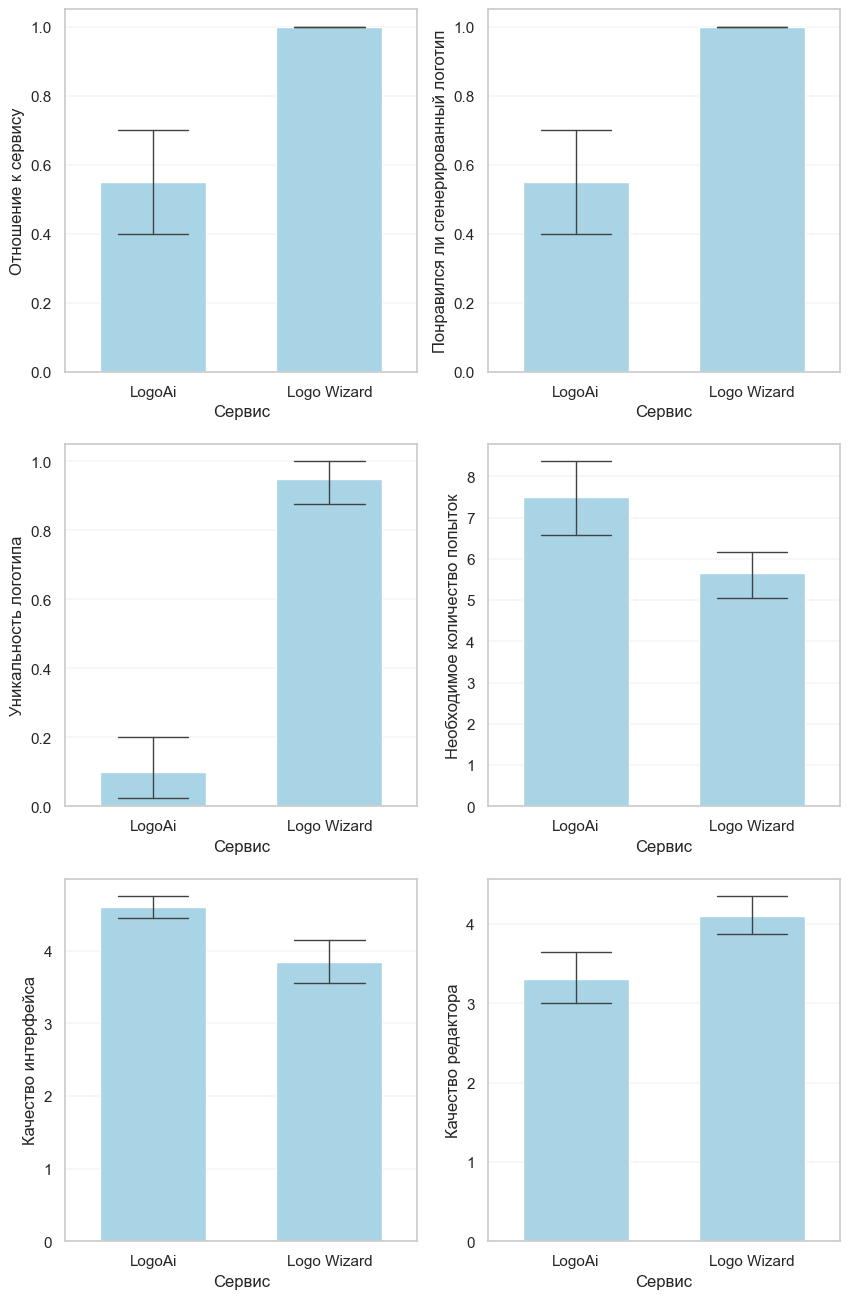

In [104]:
# sns.set(rc={'figure.figsize':(5, 4.5)})
columns = ["like_service", "like_logo", "unique", "retries", "interface", "editor"]
names = ["Отношение к сервису", "Понравился ли сгенерированный логотип", "Уникальность логотипа", "Необходимое количество попыток", "Качество интерфейса", "Качество редактора"]
sns.set_style("whitegrid")
sns.set_context("notebook", rc={"grid.linewidth": 0.2})
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(10, 16))
cnt = 0
for i in range(nrows):
    for j in range(ncols):
        ax = sns.barplot(ax=axes[i, j], data=data, x="service", y=columns[cnt], capsize=.4, color="#9FD8EF", errwidth=1, width=0.6)
        ax.set(xlabel='Сервис', ylabel=names[cnt])
        axes[i , j].set_xticklabels(["LogoAi", "Logo Wizard"])
        cnt += 1

Загрузим датасет, где респонденты выбирали топ лучших функций сервиса Logo Wizard:

In [16]:
wishes = pd.read_csv("logo_wizard_wish.csv")

Считаем топ признаков:

In [3]:
from collections import defaultdict
import re

top_features = defaultdict(int)
for i in range(1, 5):
    for k, v in dict(wishes[f"{i}"].value_counts()).items():
        feature = re.sub(r"[(][^()]*[)]", "", k).strip()
        top_features[feature] += v

top_features = dict(sorted(top_features.items(), key=lambda item: item[1], reverse=True))
top_features

{'Генерация': 30,
 'Мокапы': 28,
 'Стилизация': 26,
 'Удаление текста': 16,
 'Окраска': 8}

Визуализируем:

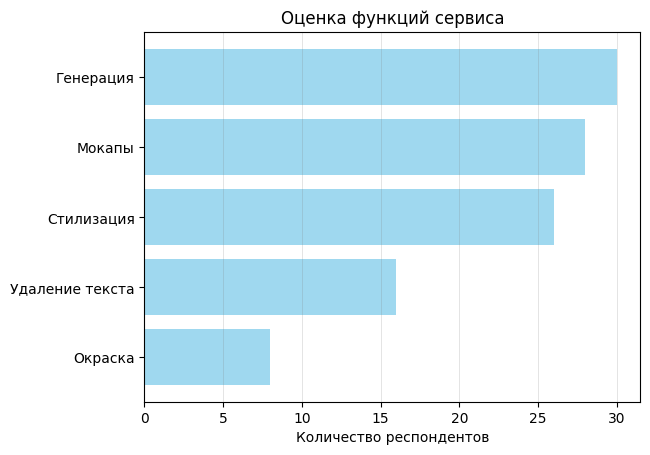

In [4]:
import numpy as np


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = list(top_features.keys())
y_pos = np.arange(len(people))
performance = list(top_features.values())

ax.barh(y_pos, performance, align='center', color="#9FD8EF")
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()
ax.set_xlabel('Количество респондентов')
ax.set_title('Оценка функций сервиса')
ax.grid(color='grey', linewidth=0.5, alpha=0.3, axis="x")

plt.show()